<a href="https://colab.research.google.com/github/GarvinAgweli/house_pricing_prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#importing data
data=pd.read_csv("/content/California_Houses.csv")

In [50]:
#calling data
data

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
0                  21250.213767  
1                  20880.600400  
2                  18811.487450  
3                  18031.047568  
4                  18031.047568  
...                         ...  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575  

[20640 rows x 14 columns]

In [51]:
data.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [53]:
#train test of data and splitting
from sklearn.model_selection import train_test_split
X=data.drop(['Median_House_Value'],axis=1)
Y=data['Median_House_Value']

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=False)

In [55]:
X_train

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
12069         4.2386           6        502            76         228   
15925         4.3898          52       2381           492        1485   
11162         3.9333          26       1718           385        1022   
4904          1.4653          38        697           208         749   
4683          3.1765          52       2373           601        1135   
...              ...         ...        ...           ...         ...   
13123         4.4125          20       1314           229         712   
19648         2.9135          27       1118           195         647   
9845          3.1977          31       1431           370         704   
10799         5.6315          34       2125           498        1052   
2732          1.3882          15       1171           328        1024   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
12069          65     33.83    -117.55       39215.937013    68596.739279   
15925         447     37.73    -122.44        4541.860422   556764.340397   
11162         368     33.83    -118.00       14111.915871    33406.229632   
4904          206     34.01    -118.26       20857.170529     4931.155661   
4683          576     34.08    -118.36       15163.215503    11150.240252   
...           ...       ...        ...                ...             ...   
13123         219     38.27    -121.26       33239.888708   541469.822873   
19648         209     37.48    -120.89       84968.276510   449706.790220   
9845          393     36.58    -121.90        1869.733710   434742.602445   
10799         468     33.62    -117.93        2046.312844    56119.357184   
2732          298     32.80    -115.56       20717.477548   285319.070347   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
12069         129067.752771        553211.144128             621191.209014  
15925         735113.808323         65197.028410               4948.970661  
11162         146401.571825        525134.257459             593163.200628  
4904          176425.991371        494310.534326             562327.926606  
4683          188145.167999        482409.552261             550420.683045  
...                     ...                  ...                       ...  
13123         720313.809072        117860.476820             116485.678240  
19648         628932.239533         90038.387995             139615.460606  
9845          610197.688182         84007.827220             140860.463374  
10799         123418.248161        547112.515140             615113.921044  
2732          150010.710437        765506.958563             833125.775424  

[16512 rows x 13 columns]

In [56]:
Y_train

12069    500001.0
15925    270000.0
11162    196100.0
4904     118800.0
4683     225000.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: Median_House_Value, Length: 16512, dtype: float64

In [57]:
#joinning data
data1=X_train.join(Y_train)
data1.head()

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
12069         4.2386           6        502            76         228   
15925         4.3898          52       2381           492        1485   
11162         3.9333          26       1718           385        1022   
4904          1.4653          38        697           208         749   
4683          3.1765          52       2373           601        1135   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
12069          65     33.83    -117.55       39215.937013    68596.739279   
15925         447     37.73    -122.44        4541.860422   556764.340397   
11162         368     33.83    -118.00       14111.915871    33406.229632   
4904          206     34.01    -118.26       20857.170529     4931.155661   
4683          576     34.08    -118.36       15163.215503    11150.240252   

       Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  \
12069         129067.752771        553211.144128             621191.209014   
15925         735113.808323         65197.028410               4948.970661   
11162         146401.571825        525134.257459             593163.200628   
4904          176425.991371        494310.534326             562327.926606   
4683          188145.167999        482409.552261             550420.683045   

       Median_House_Value  
12069            500001.0  
15925            270000.0  
11162            196100.0  
4904             118800.0  
4683             225000.0

In [58]:
#finding data correlation
data1.corr()

Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
Median_Income                  1.000000   -0.115757   0.197831     -0.006986   
Median_Age                    -0.115757    1.000000  -0.365816     -0.327031   
Tot_Rooms                      0.197831   -0.365816   1.000000      0.931353   
Tot_Bedrooms                  -0.006986   -0.327031   0.931353      1.000000   
Population                     0.004533   -0.298908   0.855653      0.876832   
Households                     0.014567   -0.309804   0.919641      0.978946   
Latitude                      -0.081245    0.016348  -0.046149     -0.074779   
Longitude                     -0.015081   -0.113274   0.054460      0.077408   
Distance_to_coast             -0.247237   -0.225941  -0.003708     -0.022580   
Distance_to_LA                -0.067297   -0.026281  -0.028152     -0.062143   
Distance_to_SanDiego          -0.056427    0.041542  -0.048765     -0.075969   
Distance_to_SanJose           -0.035549   -0.095289   0.041591      0.067710   
Distance_to_SanFrancisco      -0.021498   -0.106744   0.042610      0.068428   
Median_House_Value             0.692758    0.106470   0.133016      0.046286   

                          Population  Households  Latitude  Longitude  \
Median_Income               0.004533    0.014567 -0.081245  -0.015081   
Median_Age                 -0.298908   -0.309804  0.016348  -0.113274   
Tot_Rooms                   0.855653    0.919641 -0.046149   0.054460   
Tot_Bedrooms                0.876832    0.978946 -0.074779   0.077408   
Population                  1.000000    0.907018 -0.114819   0.105128   
Households                  0.907018    1.000000 -0.078693   0.062973   
Latitude                   -0.114819   -0.078693  1.000000  -0.924889   
Longitude                   0.105128    0.062973 -0.924889   1.000000   
Distance_to_coast          -0.041500   -0.063459  0.302773   0.008475   
Distance_to_LA             -0.114933   -0.067869  0.941539  -0.891564   
Distance_to_SanDiego       -0.115327   -0.076624  0.991605  -0.958281   
Distance_to_SanJose         0.083743    0.054675 -0.853717   0.923571   
Distance_to_SanFrancisco    0.093617    0.057181 -0.896393   0.954556   
Median_House_Value         -0.027053    0.062294 -0.142702  -0.047277   

                          Distance_to_coast  Distance_to_LA  \
Median_Income                     -0.247237       -0.067297   
Median_Age                        -0.225941       -0.026281   
Tot_Rooms                         -0.003708       -0.028152   
Tot_Bedrooms                      -0.022580       -0.062143   
Population                        -0.041500       -0.114933   
Households                        -0.063459       -0.067869   
Latitude                           0.302773        0.941539   
Longitude                          0.008475       -0.891564   
Distance_to_coast                  1.000000        0.196846   
Distance_to_LA                     0.196846        1.000000   
Distance_to_SanDiego               0.213916        0.951105   
Distance_to_SanJose               -0.074490       -0.792119   
Distance_to_SanFrancisco          -0.065974       -0.847102   
Median_House_Value                -0.470400       -0.128913   

                          Distance_to_SanDiego  Distance_to_SanJose  \
Median_Income                        -0.056427            -0.035549   
Median_Age                            0.041542            -0.095289   
Tot_Rooms                            -0.048765             0.041591   
Tot_Bedrooms                         -0.075969             0.067710   
Population                           -0.115327             0.083743   
Households                           -0.076624             0.054675   
Latitude                              0.991605            -0.853717   
Longitude                            -0.958281             0.923571   
Distance_to_coast                     0.213916            -0.074490   
Distance_to_LA                        0.951105            -0.792119   
Di

<Axes: >

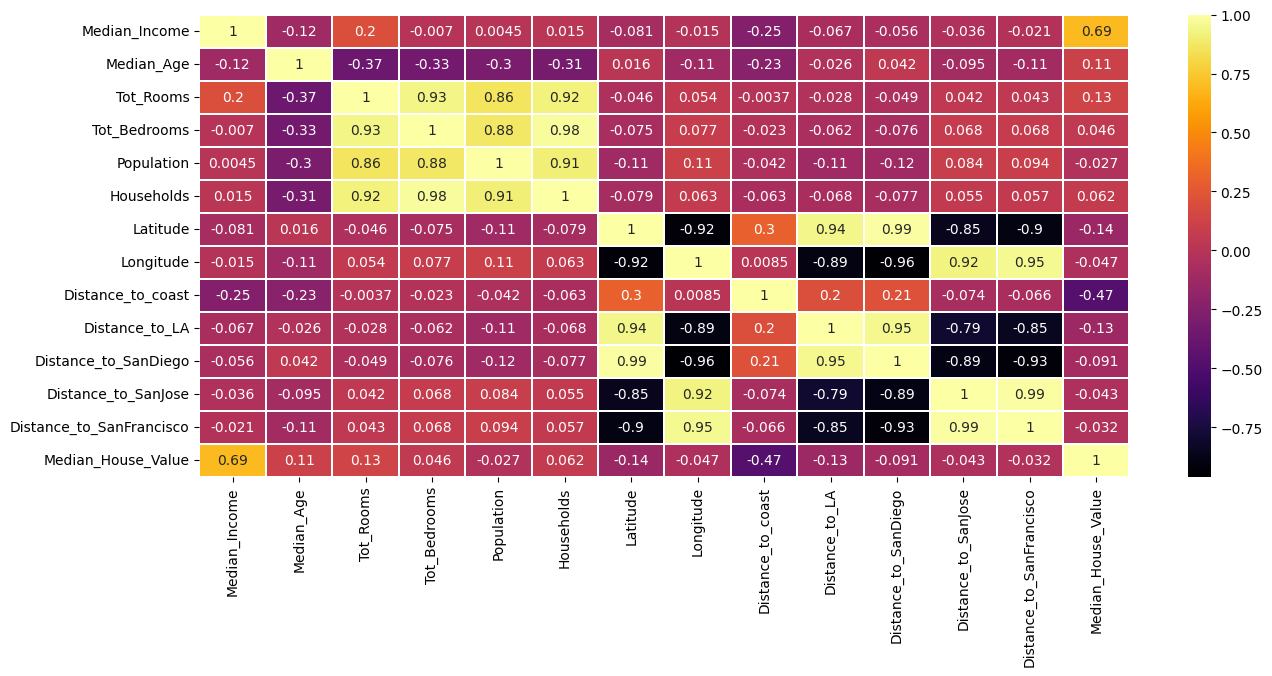

In [59]:
#visualisation of correlatoin of data
fig, ax=plt.subplots(figsize=(15,6))
sns.heatmap(data1.corr(),annot=True,cmap='inferno',linewidths=0.05)

array([[<Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>,
        <Axes: title={'center': 'Tot_Bedrooms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>,
        <Axes: title={'center': 'Distance_to_SanJose'}>],
       [<Axes: title={'center': 'Distance_to_SanFrancisco'}>,
        <Axes: title={'center': 'Median_House_Value'}>, <Axes: >,
        <Axes: >]], dtype=object)

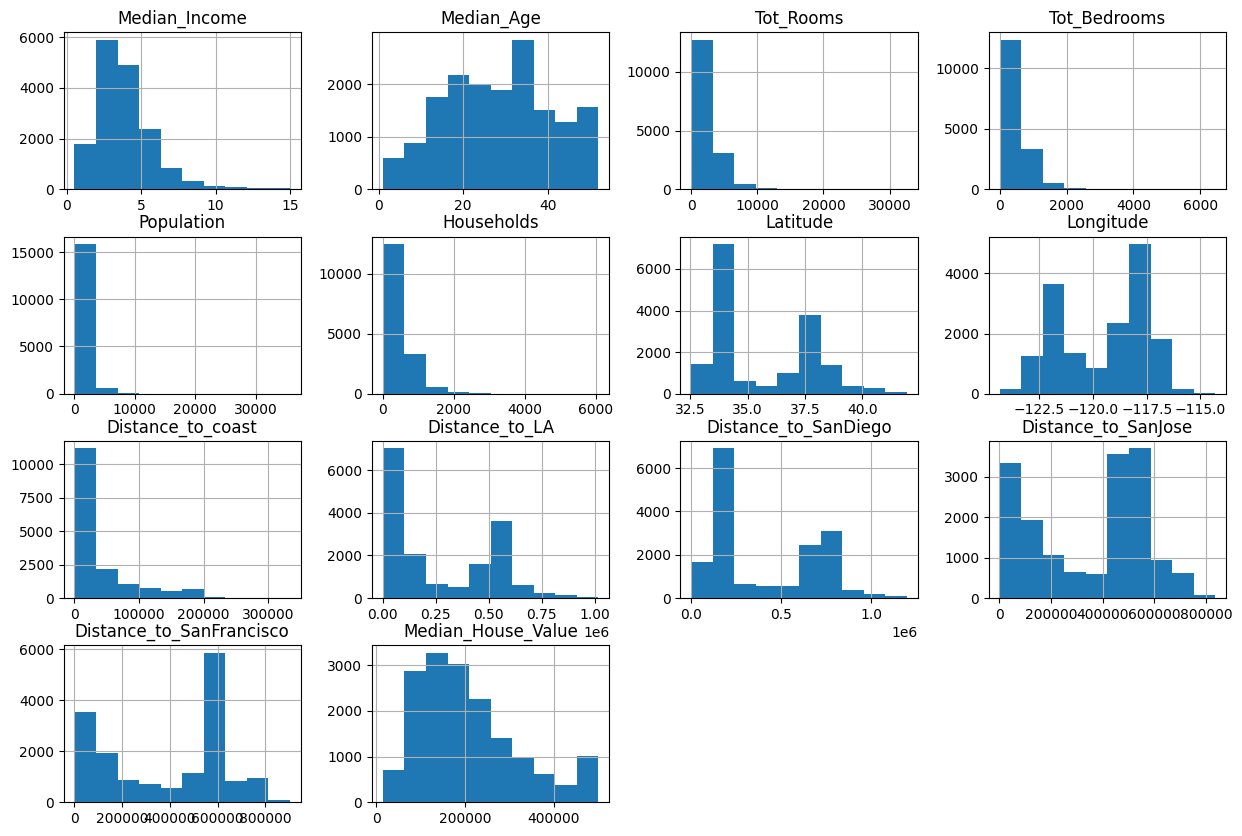

In [60]:
#fig, ax=plt.subplots(figsize=(15,6))
data1.hist(figsize=(15,10))

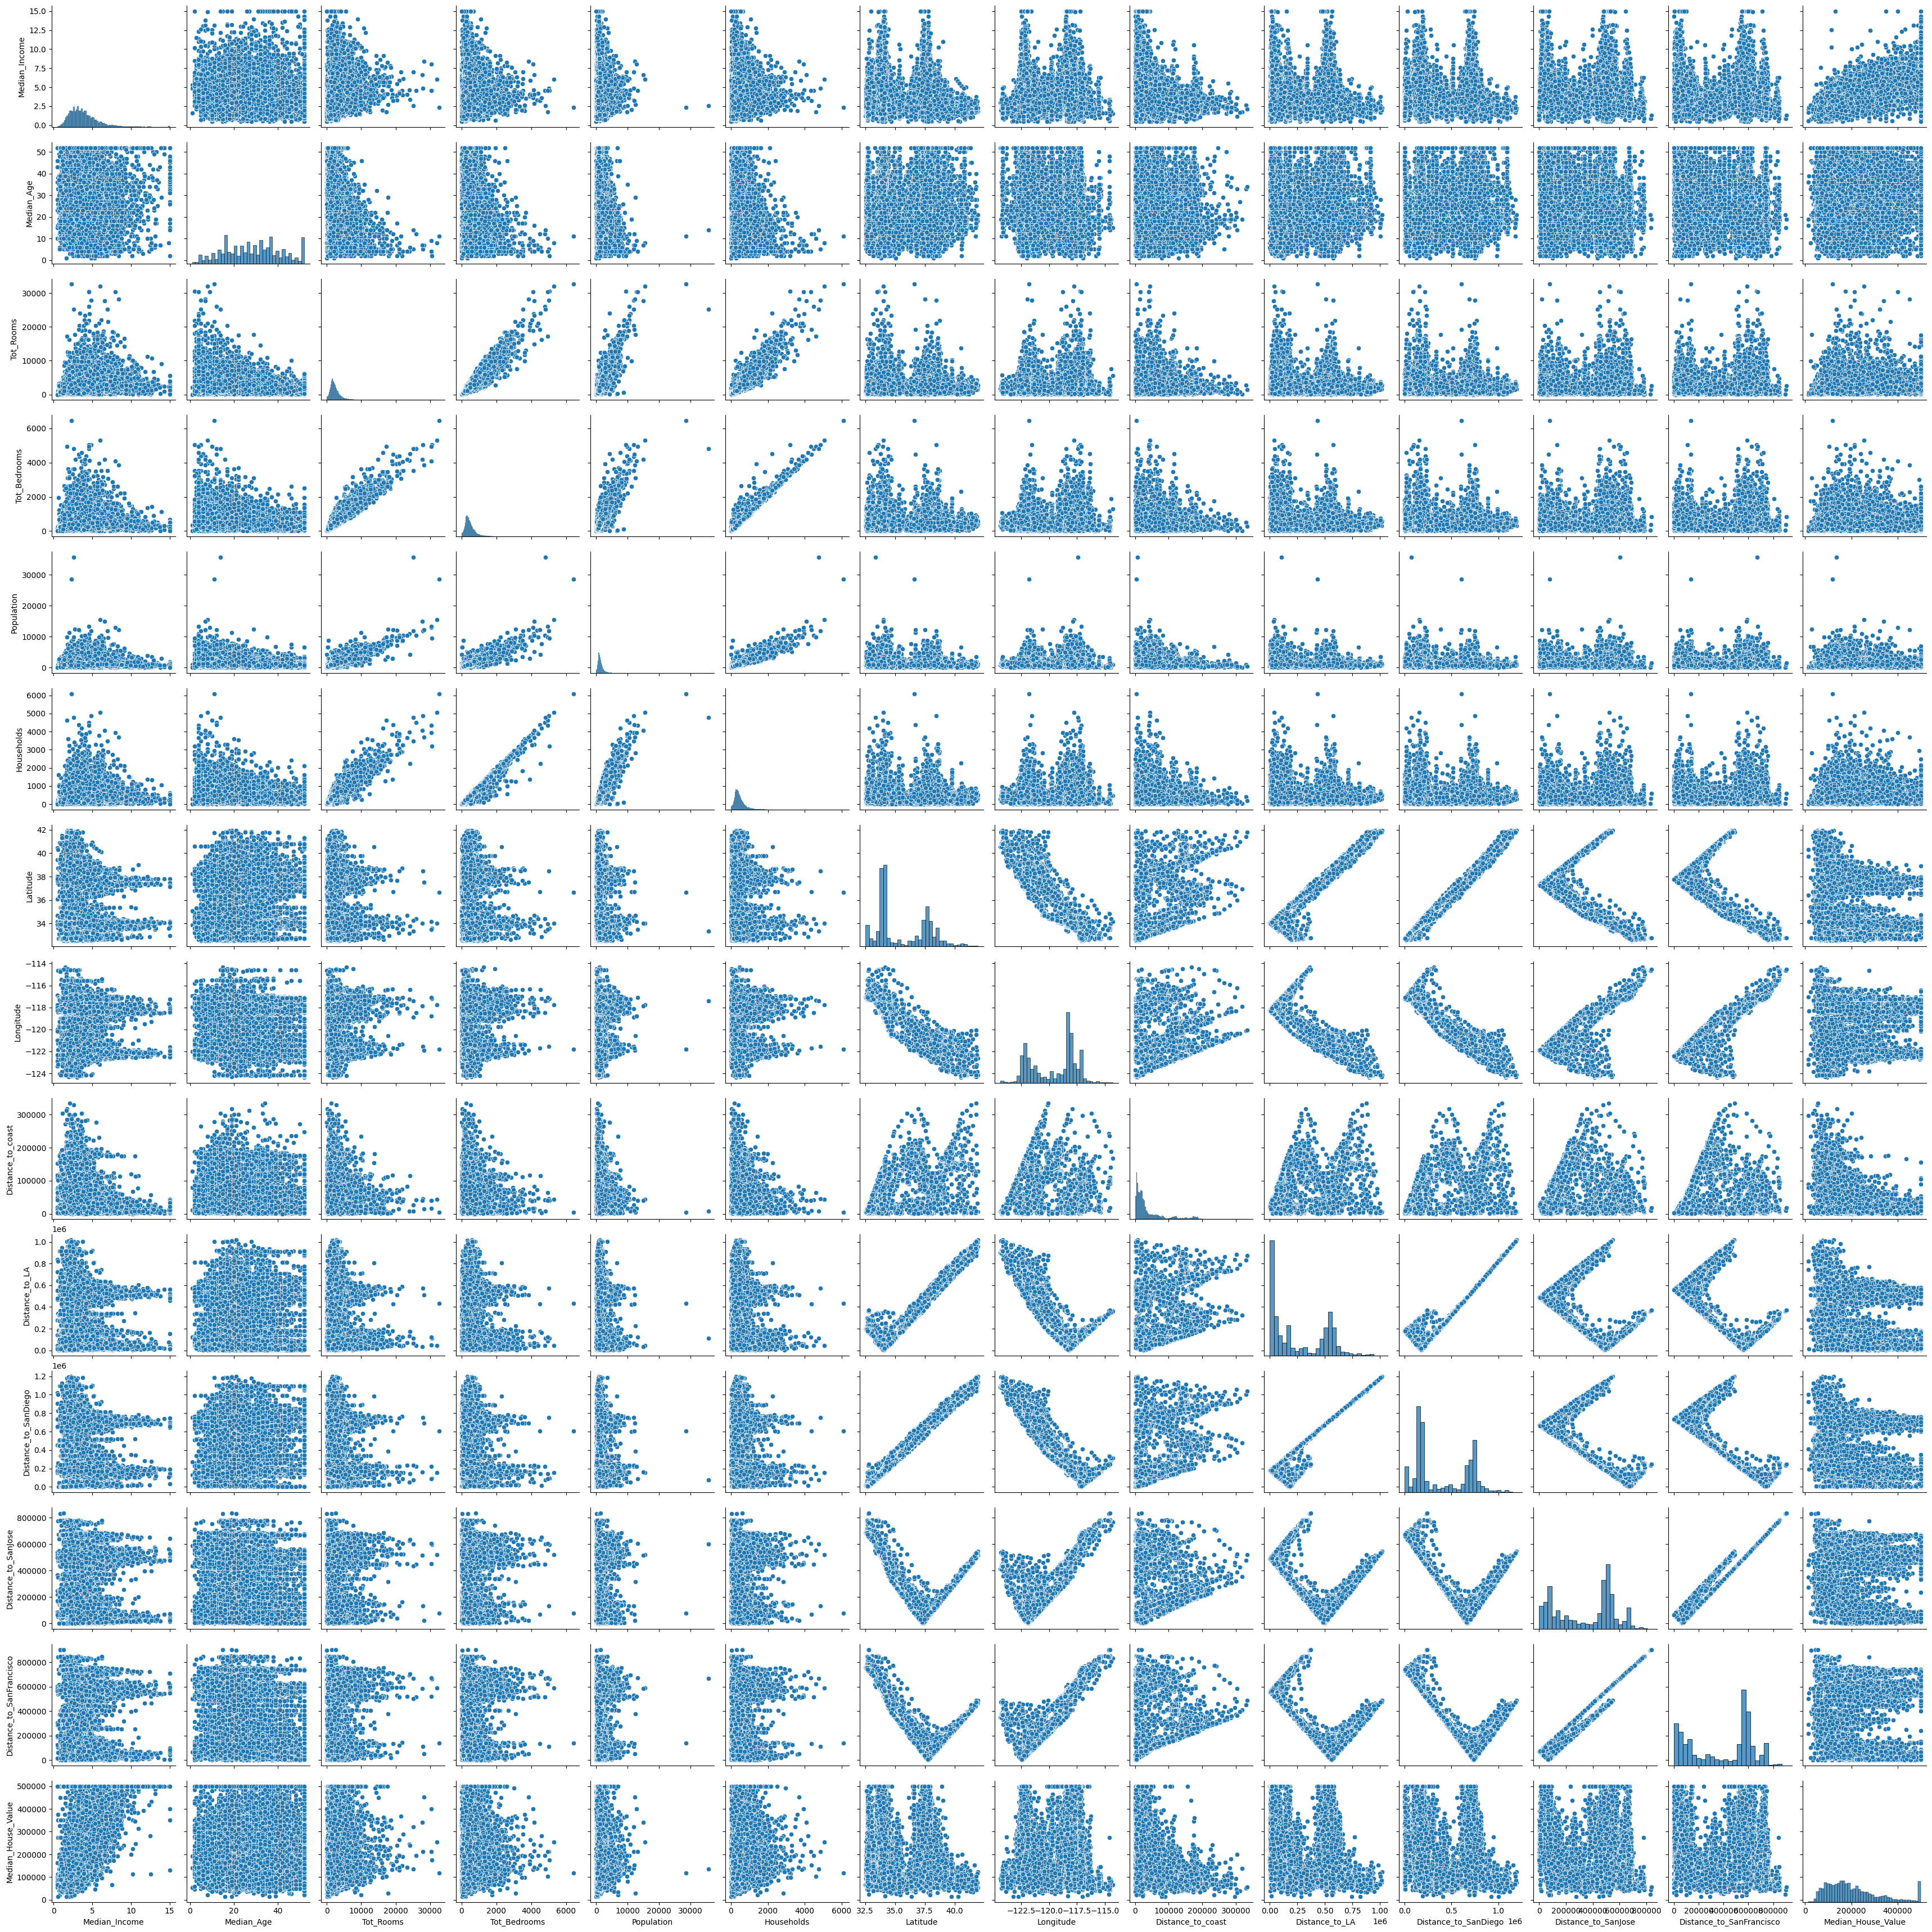

In [61]:
sns.pairplot(data1)

<Axes: xlabel='Latitude', ylabel='Longitude'>

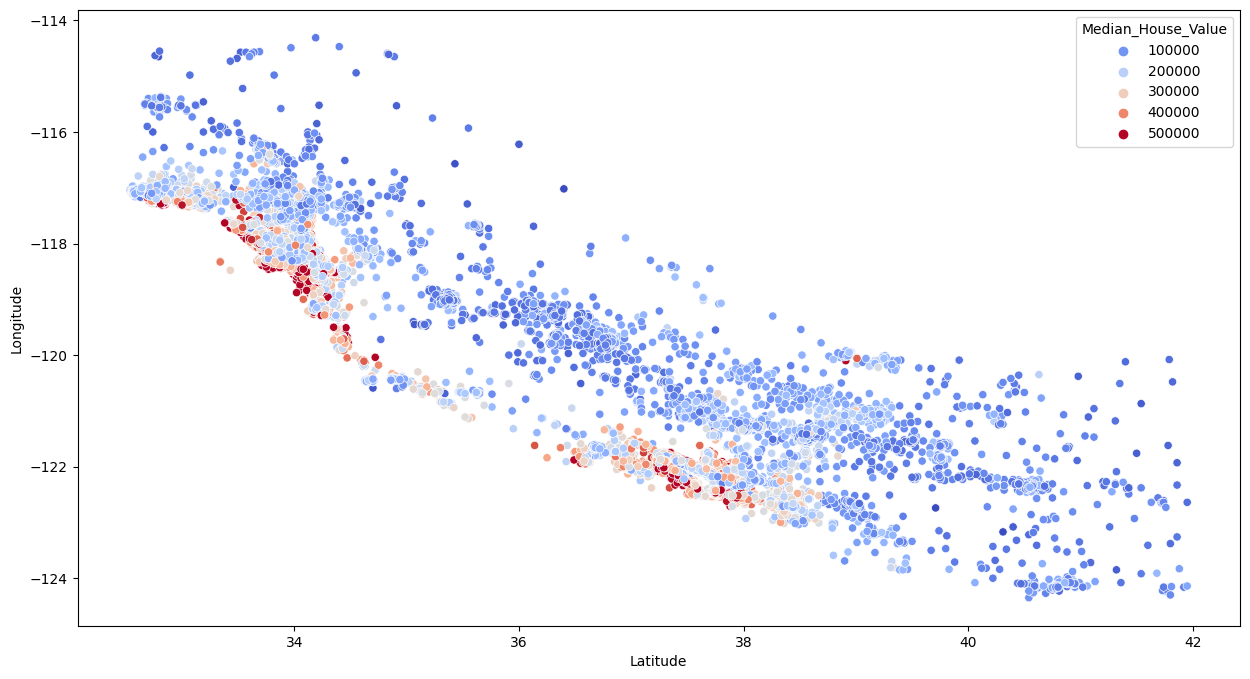

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Latitude',y='Longitude',data=data1,hue='Median_House_Value',palette='coolwarm')

In [63]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [64]:
lr.fit(X_train,Y_train)

LinearRegression()

In [65]:
#test predictoin
Y_pred=lr.predict(X_test)
Y_pred

array([187955.11873564, 284945.81958294, 193406.8653152 , ...,
        88270.26940597, 287430.44206605, 212929.17954888])

In [66]:
lr.score(X_train,Y_train)

0.6485602660269142

In [67]:
lr.score(X_test,Y_test)

0.638016190003353

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf= RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [70]:
y_pred=rf.predict(X_test)

In [71]:
Y_test

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
6655     169500.0
3505     204600.0
1919     128600.0
1450     259500.0
4148     167600.0
Name: Median_House_Value, Length: 4128, dtype: float64

In [72]:
rf.score(X_train,Y_train)

0.9764940578088734

In [73]:
rf.score(X_test,Y_test)

0.8317751745281473

In [ ]:
rf.score(X_train,Y_train)

0.9764940578088734

In [74]:
rf.predict([[8.3252,41,880,129,322,126,37.8,-122.23,9263.04077285038,556529.1583418,735501.80698384,67432.5170008434,21250.2137667799]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([464696.47])

In [75]:
predict_1=rf.predict([[50,41,8888,129,589,2323,233,-123,3456,5678,123,674,7000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [76]:
predict_1

array([444497.37])